# Homework Day 17 - Exploratory Data Analysis (EDA) II
### Nama   :  Annaz Julian
### Batch  :  10

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset Telco

In [2]:
user_telco = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
user_telco.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
634,9411-TPQQV,Female,0,No,No,40,No,No phone service,DSL,Yes,...,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),54.55,2236.2,No
5247,4971-PUYQO,Female,0,No,No,27,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,94.55,2724.6,Yes
1447,2951-QOQTK,Male,0,No,Yes,4,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Credit card (automatic),80.80,332.45,Yes
4122,4632-XJMEX,Male,0,No,Yes,53,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,No,Credit card (automatic),62.85,3419.5,No
5580,8859-YSTWS,Male,0,No,No,48,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.95,1004.5,No


In [3]:
user_telco.info()     # Terlihat di totalCharges tidak berbentuk integer dan
                      # tidak terdeteksi missing valuenya

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Cek Missing Value
user_telco.isna().sum()    # Missing value tidak ada ternyata

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# Exclude rows with TotalCharges  column contains white space
user_telco=user_telco[~user_telco['TotalCharges'].str.contains(' ')]

In [7]:
# Transform TotalCharges col to Float
user_telco['TotalCharges']= user_telco['TotalCharges'].astype(float)    # Mengubah tipe data TotalCharges dari string jadi integer

In [8]:
user_telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [9]:
# Cek kembali missing valuenya dan tidak ada memang
user_telco.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
# Mengetahui value count dari TotalCharges
user_telco['TotalCharges'].value_counts()

20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: TotalCharges, Length: 6530, dtype: int64

In [11]:
# Cek TotalCharges sudah menjadi Integer
user_telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


### Mengecek Duplicated Rows and Columns

In [12]:
# Cek Columns
user_telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
# Cek jumlah duplicated rows
user_telco.duplicated().sum()       # Tidak ada duplikat baris

0

## Statistical Summary of Columns

In [14]:
categorical = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService',
               'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
               'StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
numerical = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']


# Statistical Summary for Categorical column
user_telco[categorical].describe()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [15]:
# Mengetahui value count dari setiap variabel kategoriknya
for col in categorical:
  print(f"Value counts of {col} column")
  print(user_telco[col].value_counts(), '\n')

Value counts of gender column
Male      3549
Female    3483
Name: gender, dtype: int64 

Value counts of Partner column
No     3639
Yes    3393
Name: Partner, dtype: int64 

Value counts of Dependents column
No     4933
Yes    2099
Name: Dependents, dtype: int64 

Value counts of PhoneService column
Yes    6352
No      680
Name: PhoneService, dtype: int64 

Value counts of MultipleLines column
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

Value counts of InternetService column
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

Value counts of OnlineSecurity column
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64 

Value counts of OnlineBackup column
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64 

Value counts of DeviceProtection column
N

Observation based on summary above :


terdapat unique value yang dapat dilihat dari masing" kolom apa saja isinya.

In [16]:
# Statistical Summary for numerical Column
user_telco[numerical].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Observation

Dari data tipe integer ini, bisa dilihat mulai dari mean, std,min quartilnya, serta max dari setiap featurenya.

### Univariate Analysis

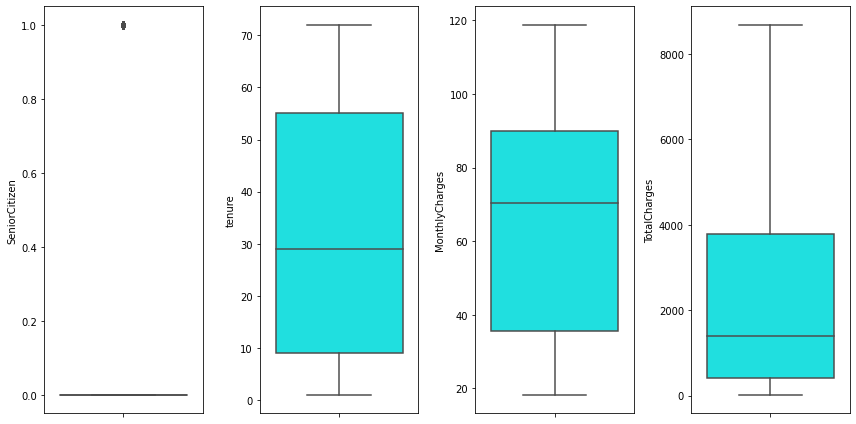

In [17]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numerical
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=user_telco[features[i]], color='cyan')
    plt.tight_layout()

In [18]:
# Mengetahui isi data dari SeniorCitizen
outlier = user_telco['SeniorCitizen'].min()

user_telco[user_telco['SeniorCitizen'] == outlier]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [19]:
user_telco['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

Observation

- Berdasarkan analisis outlier tersebut, ada outlier pada column SeniorCitizen, tetapi setelah diliat isi datanya, meskipun data numerik tetapi termasuk categorical jenis datanya

## Multivariate Analysis

In [20]:
# remember the dataset
user_telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


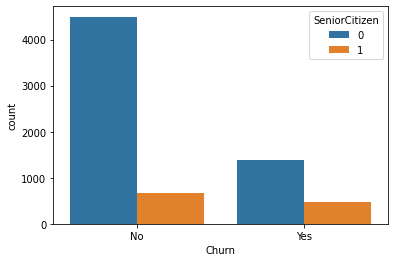

In [21]:
# SeniorCitizen affect Churn?
sns.countplot(data=user_telco,
            x='Churn',
            hue='SeniorCitizen')

Observation

- Berdasarkan barchart diatas, bisa dilihat mengenai customer yang dikategorikan bukan seniorcitizen memiliki tingkat tidak churn yang tinggi secara signifikan dibanding yang dikateogorikan seniorcitizen

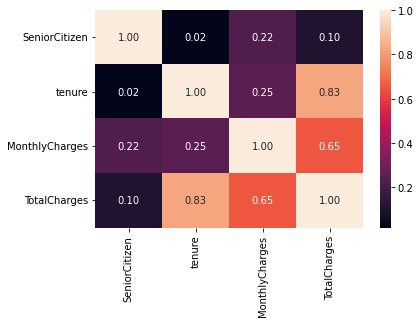

In [ ]:
# correlation heatmap
correlation = user_telco.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Observation

- Berdasarkan hasil korelasi diatas, hasil yang paling tinggi ada pada korelasi antara tenure TotalCharges, karena memang semakin tinggi tenurenya, tentu TotalChargesnya akan semakin besar, begitu pun sebaliknya

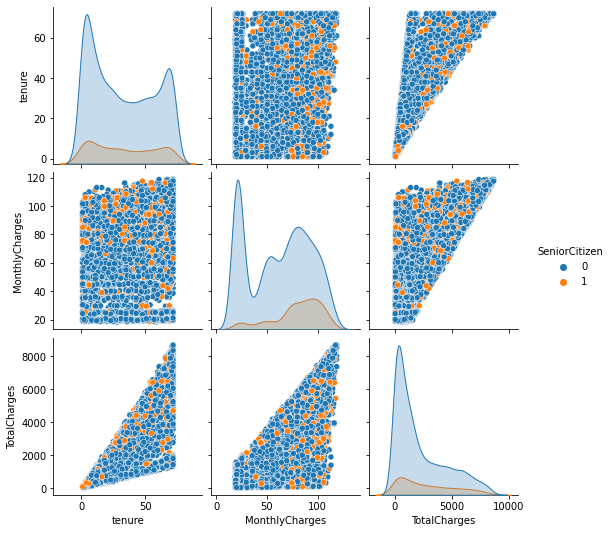

In [ ]:
# pairplot of the data
sns.pairplot(user_telco, hue='SeniorCitizen')

## Observation
###### 1. Tenure and Total Charges are highly correlated each other
###### 2. MonthlyCharges and Total Charges are enough correlated each other

# Perform Deep Dive Question
1. Ask Minimum 2 question
2. At least 1 of them should involve group by aggregation

In [ ]:
# Recall dataset telco
user_telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
## 1. Who are Top 10 customers with the most TotalCharges?
user_telco['TotalCharges']

top10_cust = (user_telco
              .groupby('customerID')
              .agg(Total=('TotalCharges','sum'))
              .reset_index()
              .sort_values('Total',ascending=False)
              .head(10)
              )

top10_cust

,customerID,Total
2000,2889-FPWRM,8684.80
5350,7569-NMZYQ,8672.45
6844,9739-JLPQJ,8670.10
6881,9788-HNGUT,8594.40
6264,8879-XUAHX,8564.75
6982,9924-JPRMC,8547.15
462,0675-NCDYU,8543.25
4710,6650-BWFRT,8529.50
95,0164-APGRB,8496.70
1028,1488-PBLJN,8477.70


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

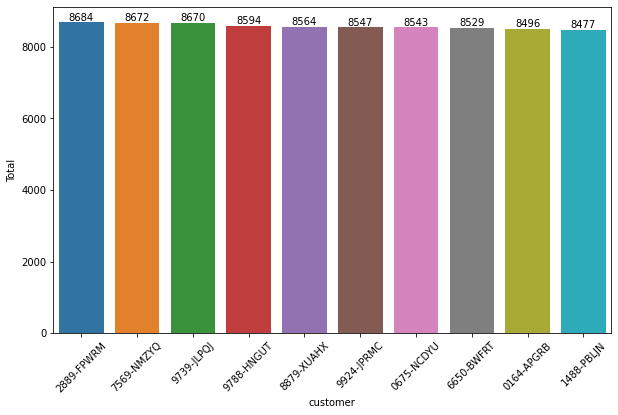

In [ ]:
# Make bar chart
df = top10_cust

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax = sns.barplot(data=df, x='customerID', y='Total')
#ax.set_xticklabels(df['CustomerID'], rotation=90 )
ax.set_xlabel("customer")

rects = ax.patches

# Make some labels.
labels = df['Total'].astype(int)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom"
    )

plt.xticks(rotation=45)

Obsrvation

- Berdasarkan visualisasi data diatas, totalCharges 10 customer tertinggi berada pada rentang 8600an sampai 8400an sekian.

In [4]:
# Remember dataset
user_telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Pertanyaan 2 : Customer mana yang paling rendah TotalChargesnya?Tentukan 10 customer tersebut

In [41]:
## 1. Who are low 10 customers with the least TotalCharges?
user_telco['TotalCharges']

low10_cust = (user_telco
              .groupby('customerID')
              .agg(Total_low=('TotalCharges','sum'))
              .reset_index()
              .sort_values('Total_low',ascending=True)
              .head(10)
              )

low10_cust

,customerID,Total_low
2056,2967-MXRAV,18.80
6339,8992-CEUEN,18.85
6549,9318-NKNFC,18.85
7022,9975-SKRNR,18.90
980,1423-BMPBQ,19.00
686,1015-OWJKI,19.05
4328,6121-VZNQB,19.10
6628,9441-QHEVC,19.10
4645,6569-KTMDU,19.10
5181,7302-ZHMHP,19.15


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

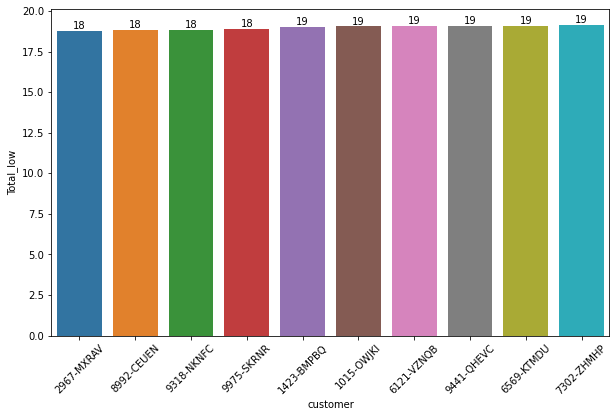

In [31]:
# barplot untuk low 10 customer
dff = low10_cust

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax = sns.barplot(data=dff, x='customerID', y='Total_low',)
#ax.set_xticklabels(df['CustomerID'], rotation=90 )
ax.set_xlabel("customer")

rects = ax.patches

# Make some labels.
labels = dff['Total_low'].astype(int)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom"
    )

plt.xticks(rotation=45)

Observation

- Berdasarkan hasil diatas, TotalCharges 10 customer terendah berada pada rentang 18 - 19